# DICAS GUSTAVO - Notebook para determinação da quantidade de chuva (mm)

## Importações e Configurações iniciais

In [37]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sn

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import  metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import matplotlib.pyplot as plt

import seaborn as sns # Statistical data visualization

import plotly.graph_objects as go
import plotly.express as px
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, Dense, Dropout, Masking, Embedding

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Análise Exploratória dos Dados

In [38]:
#Tratamento de dados
missing_values = ['n/a','na','*****','*','*******',' -', '******', '5..84', '3..66', '3.3.21', '1..41', '********', '3.7.94', '354.59*', '564..79', '5.04.24', '21:36','**********', '***', '*********', '03:18', '00:00', '03:48', '08:42', '03:06', '09:06', '01:30', '07:48', '09:12', '10:18', '01:24', '#VALUE!' , '926,4923,8', '27/07/1902**21:36:00', '-', '926.4923.8']

dados_clima = pd.read_csv('C:/Users/auped/OneDrive - Universidade Federal de Uberlândia/Área de Trabalho/python 05-11/pesquisa/dadosclimaatt - CORRETO.csv', header = None, sep=';', na_values=missing_values)
dados_clima.columns=['Temp Máx (°C)', 'Temp Mín (°C)', 'Temp Média (°C)', 'Velocidade do Vento (km/h)', 'Radiação solar (cal/cm²/h)', 'Pressão (mb)', 'UR (%)', 'Chuva (mm)', 'Mês', 'Ano']
dados_clima['UR (%)'] = dados_clima['UR (%)'].str.replace(':', '.')
dados_clima['Pressão (mb)'] = dados_clima['Pressão (mb)'].str.replace(',,', '.')
dados_clima['UR (%)'] = dados_clima['UR (%)'].astype(float)
dados_clima['Pressão (mb)'] = dados_clima['Pressão (mb)'].astype(float)
dados_clima['Ano'] = dados_clima['Ano'].str.replace(',,', '')
dados_clima['Ano'] = dados_clima['Ano'].astype(int)

combine = [dados_clima]
chuva = dados_clima['Chuva (mm)']

#Primeiras cinco linhas dos dados pós-tratados
dados_clima.head()
dados_clima.dropna()

#Número de missing values encontrdos em cada coluna
print(dados_clima.isnull().sum())

Temp Máx (°C)                  124
Temp Mín (°C)                  122
Temp Média (°C)                110
Velocidade do Vento (km/h)     528
Radiação solar (cal/cm²/h)     476
Pressão (mb)                   400
UR (%)                        1754
Chuva (mm)                     277
Mês                              0
Ano                              0
dtype: int64


In [39]:
dados_clima.describe()

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Chuva (mm),Mês,Ano
count,13297.000000,13299.000000,13311.000000,12893.000000,12945.000000,13021.000000,11667.000000,13144.000000,13421.000000,13421.000000
mean,27.886343,14.175675,21.049129,3.234452,369.640664,933.542209,71.308535,4.094814,6.491916,2000.876909
std,3.788595,4.073522,3.482316,2.713455,126.883069,191.737274,15.553777,10.548043,3.439691,10.608740
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1983.000000
25%,25.800000,11.400000,18.900000,1.550000,286.240000,929.000000,63.500000,0.000000,4.000000,1992.000000
50%,28.200000,14.900000,21.500000,2.530000,363.920000,933.400000,73.300000,0.000000,7.000000,2001.000000
75%,30.600000,17.400000,23.700000,4.100000,457.420000,937.400000,82.000000,1.800000,9.000000,2010.000000
max,39.200000,28.600000,34.200000,99.200000,1019.570000,9925.800000,100.000000,158.400000,12.000000,2019.000000


In [40]:
dftabela = dados_clima.describe() 
dftabela.to_excel("tabelaestatisticaGLOBALL.xlsx")

### Criação de uma nova classe que determina se naquele dia choveu ou não

In [41]:

# Loop que preenche a nova coluna com 0(não choveu) e 1(choveu)
for dados_clima in combine:    
    dados_clima.loc[ dados_clima['Chuva (mm)'] == 0, 'Choveu?'] = 0
    dados_clima.loc[(dados_clima['Chuva (mm)'] > 0), 'Choveu?'] = 1

#Visualização das primeiras cinco linhas da tabela
dados_clima.head()   



,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Chuva (mm),Mês,Ano,Choveu?
0,26.8,14.0,20.4,3.39,340.16,926.1,88.5,23.6,1,1983,1.0
1,27.2,13.0,20.1,3.02,340.16,927.6,86.6,20.4,1,1983,1.0
2,27.4,17.2,22.3,5.97,370.18,930.0,87.2,21.2,1,1983,1.0
3,28.2,17.0,22.6,4.25,420.20,931.3,8.0,0.0,1,1983,0.0
4,29.0,18.2,23.6,3.25,160.08,931.4,91.8,40.0,1,1983,1.0


In [42]:
print('\nMissing Values no dataframe:\n',dados_clima.isnull().sum(), sep="")


Missing Values no dataframe:
Temp Máx (°C)                  124
Temp Mín (°C)                  122
Temp Média (°C)                110
Velocidade do Vento (km/h)     528
Radiação solar (cal/cm²/h)     476
Pressão (mb)                   400
UR (%)                        1754
Chuva (mm)                     277
Mês                              0
Ano                              0
Choveu?                        277
dtype: int64


In [43]:
#Tratar os Missing Values (Valores Ausentes)

dados_clima['Temp Mín (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Temp Média (°C)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Velocidade do Vento (km/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última velocidade antes do Missing Value
dados_clima['Radiação solar (cal/cm²/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última radiação antes do Missing Value
dados_clima['UR (%)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última taxa UR antes do Missing Value
dados_clima['Chuva (mm)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última quantidade antes do Missing Value
dados_clima['Pressão (mb)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Choveu?'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Temp Máx (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
#dados_clima['Choveu?'] = dados_clima['Choveu?'].astype(int)


#verificar os missing values após a imputação acima
print('\nMissing Values no dataframe  após o tratamento:\n',dados_clima.isnull().sum(), sep="")


Missing Values no dataframe  após o tratamento:
Temp Máx (°C)                 0
Temp Mín (°C)                 0
Temp Média (°C)               0
Velocidade do Vento (km/h)    0
Radiação solar (cal/cm²/h)    0
Pressão (mb)                  0
UR (%)                        0
Chuva (mm)                    0
Mês                           0
Ano                           0
Choveu?                       0
dtype: int64


In [44]:
# Usamos a correlação de Pearson e ordenamos os valores
columns_corr = dados_clima.corr(method='pearson')['Chuva (mm)'].sort_values()
print(columns_corr)

Radiação solar (cal/cm²/h)   -0.106548
Velocidade do Vento (km/h)   -0.058436
Temp Máx (°C)                -0.033714
Pressão (mb)                 -0.000511
Mês                           0.021058
Temp Média (°C)               0.057226
UR (%)                        0.126471
Temp Mín (°C)                 0.128241
Ano                           0.157242
Choveu?                       0.427508
Chuva (mm)                    1.000000
Name: Chuva (mm), dtype: float64


## Seleção do Período para Análise

In [46]:
# 70% para treino / 30% para teste

data_inicio = 1980
data_fim = 2020
data_inicio_treinamento = 1983
data_fim_treinamento = 2008
data_inicio_teste = 2009
data_fim_teste = 2019



In [47]:
dados_clima.drop(dados_clima.loc[dados_clima['Chuva (mm)']==0].index, inplace=True)

In [48]:
dadosparateste = dados_clima.copy()

#Criando uma nova coluna de chuva para ficar no final do dataframe

qtdchuva = dadosparateste['Chuva (mm)']


dadosparateste['Chuva att (mm)'] = qtdchuva

#Visualização das primeiras cinco linhas da tabela
dadosparateste.head()  

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Chuva (mm),Mês,Ano,Choveu?,Chuva att (mm)
0,26.8,14.0,20.4,3.39,340.16,926.1,88.5,23.6,1,1983,1.0,23.6
1,27.2,13.0,20.1,3.02,340.16,927.6,86.6,20.4,1,1983,1.0,20.4
2,27.4,17.2,22.3,5.97,370.18,930.0,87.2,21.2,1,1983,1.0,21.2
4,29.0,18.2,23.6,3.25,160.08,931.4,91.8,40.0,1,1983,1.0,40.0
5,25.4,19.0,22.2,4.82,280.13,928.2,93.4,53.2,1,1983,1.0,53.2


In [49]:
dadosparateste.drop(columns = ['Chuva (mm)'], axis = 1, inplace=True)


## Criar funções que serão utilizadas por todos os Modelos

In [50]:
# Library para statmodels
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error

#Definir funções que serão utilizadas por todos os modelos de predição

#Imprimir mensagens de erro da predição
def imprimir_scores_predicao(strModel, y_target, arPredict):
  #print(strModel, ' - R2: ', r2_score(y_target, arPredict))
  print(strModel, ' - MAE:  ', mean_absolute_error(y_target, arPredict))
  print(strModel, ' - MAPE: ', mean_absolute_percentage_error(y_target, arPredict))
  #print(strModel, ' - MSE: ', mean_squared_error(y_target, arPredict))
  print(strModel, ' - RMSE: ', np.sqrt(mean_squared_error(y_target, arPredict)))
  print(strModel, ' - MSE: ',mean_squared_error(y_target, arPredict))
  print(strModel, ' - R2: ',r2_score(y_target, arPredict))
  #mse = metrics.mean_squared_error(y, yhat)
  
  
def imprimir_graficos_predicao(strModel, y_target, arPredict):
  
  df_Test_Predicted = y_target.copy()
  df_Test_Predicted['Daily rain (mm)'] = arPredict

  #Plotagem dos dados de teste e dados previstos
  plt.figure(figsize=(16,8))
  plt.plot(y_target.loc['Dia'], y_target, color = 'blue', label = 'Chuva Real')
  plt.plot(y_target.loc['Dia'], arPredict, color = 'red', label = 'Chuva Prevista')
  font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 13.5,
        }
  plt.title('Comparação entre o real e o previsto pelo modelo', fontdict=font)
  plt.xlabel('Período')
  plt.ylabel('Quantidade de chuva')
  plt.legend()
  plt.grid(True)
  #plt.savefig('lstm2.pdf')
  plt.show() 

# Modelos de Aprendizado de Máquina (Machine Learning) - Regressão

In [51]:
#Criar os dataframe de Treinamento e Teste
df_train =  dadosparateste[dadosparateste['Ano'] >= data_inicio_treinamento]
df_train =  dadosparateste[dadosparateste['Ano'] <= data_fim_treinamento]
df_test = dadosparateste[dadosparateste['Ano'] >= data_inicio_teste]
df_test =  dadosparateste[dadosparateste['Ano'] <= data_fim_teste]

X_train = df_train.iloc[:,0:9]
y_train = df_train[['Chuva att (mm)']]

X_test = df_test.iloc[:,0:9]
y_test = df_test[['Chuva att (mm)']]

X_test.head()

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Mês,Ano
0,26.8,14.0,20.4,3.39,340.16,926.1,88.5,1,1983
1,27.2,13.0,20.1,3.02,340.16,927.6,86.6,1,1983
2,27.4,17.2,22.3,5.97,370.18,930.0,87.2,1,1983
4,29.0,18.2,23.6,3.25,160.08,931.4,91.8,1,1983
5,25.4,19.0,22.2,4.82,280.13,928.2,93.4,1,1983


# XGBOOST 

In [59]:
import xgboost as xgb

In [60]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 100, alpha = 1, n_estimators = 100000)

In [61]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[18:25:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [62]:
imprimir_scores_predicao("XGBoost", y_test, preds)


XGBoost  - MAE:   11.011868787124333
XGBoost  - MAPE:  2.095942856210167
XGBoost  - RMSE:  33.5113055693779
XGBoost  - MSE:  1123.0076009642185
XGBoost  - R2:  0.03403446951867217


[0.11780195 0.06181997 0.07605229 0.1810997  0.14419602 0.09856088
 0.11331361 0.08963115 0.11752445]


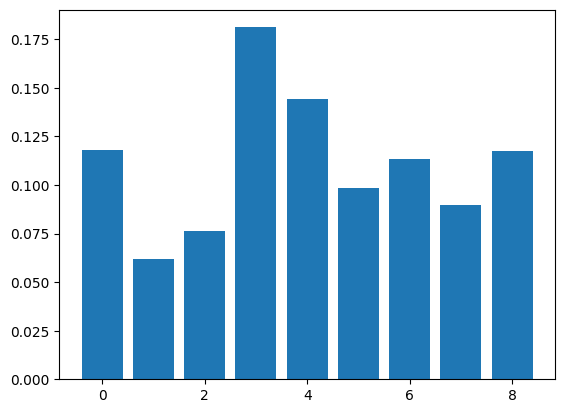

In [63]:
from matplotlib import pyplot
print(xg_reg.feature_importances_)
# plot
pyplot.bar(range(len(xg_reg.feature_importances_)), xg_reg.feature_importances_)
pyplot.show()

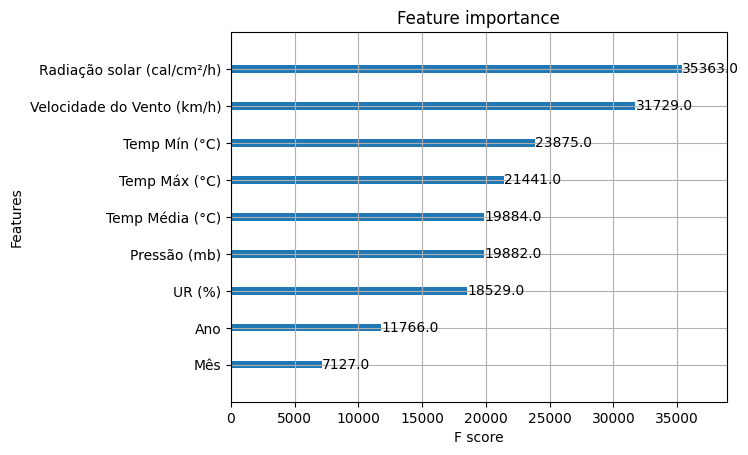

In [64]:
from xgboost import plot_importance
plot_importance(xg_reg)
pyplot.show()

In [65]:
chuvaprevista = []
for z in range(len(preds)):
    #print(y_pred4[z])
    chuvaprevista.append(preds[z])
    
df_test['Previsão']= chuvaprevista
df_test.tail()    

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Mês,Ano,Choveu?,Chuva att (mm),Previsão
13394,27.2,15.5,21.4,1.49,198.76,928.5,84.0,9,2019,1.0,5.1,14.717896
13395,27.2,15.2,21.2,1.51,207.72,931.0,80.3,9,2019,1.0,2.3,11.630391
13396,24.8,15.0,19.9,4.30,224.51,931.8,88.3,9,2019,1.0,1.2,17.231785
13415,22.8,15.4,19.1,2.13,192.04,928.0,90.0,9,2019,1.0,12.9,14.327219
13416,16.9,13.0,15.0,3.10,80.06,926.1,92.0,9,2019,1.0,7.9,12.558731


In [66]:

df_test = df_test[df_test['Ano']>= 1980]
df_test =  df_test[df_test['Ano'] <= 2000]

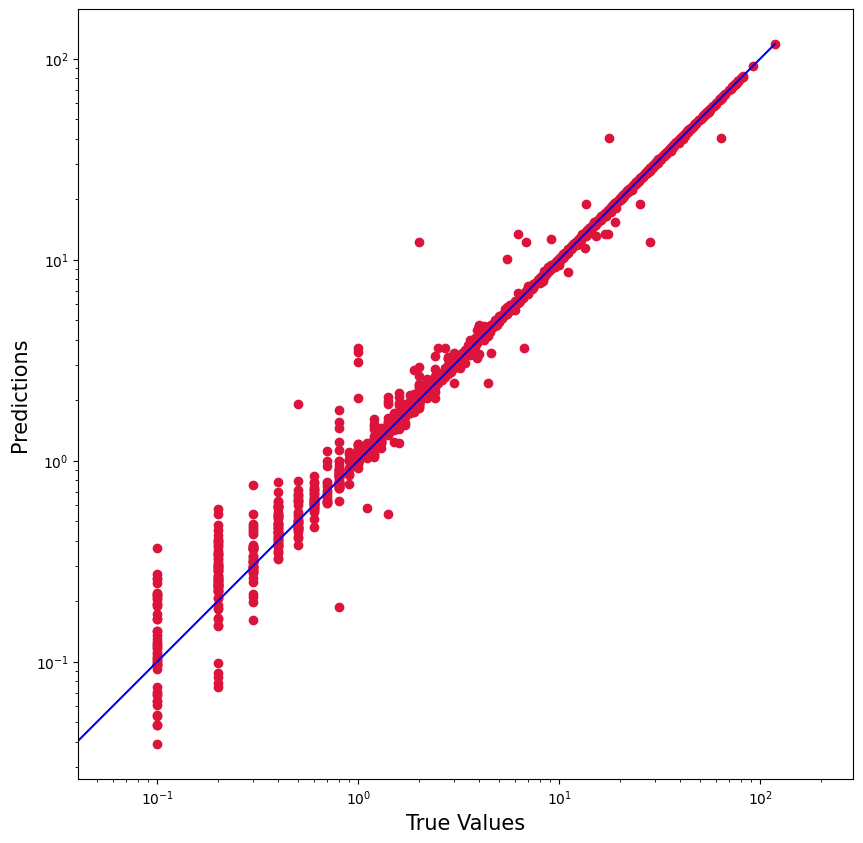

In [67]:
plt.figure(figsize=(10,10))

true_value = df_test['Chuva att (mm)']
predicted_value = df_test['Previsão']
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()